## Importing the libraries

In [1]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00


In [2]:
!pip install Entropy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for Entropy: filename=entropy-0.1.5-py3-none-any.whl size=7177 sha256=3cb3b990bc4e8a1b9c554cbc4672bcbd1a1a80f800976f0a5cfda91158f1e1ba
  Stored in directory: /root/.cache/pip/wheels/7b/ae/a5/3981344d7be76f408fc6c9c280cb1706f033d4c1018913897a
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b9925db6bb3afdb482970cfea05b62c4f6a90335874e8954f6445cc885a68e12
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built Entropy docopt


In [3]:
!pip install EntropyHub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.5 MB/s eta 0:00:00


In [4]:
!pip install xgboost

In [5]:
!pip install lightgbm

In [6]:
!pip install pyinform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 2.8 MB/s eta 0:00:00


In [7]:
!pip install nolds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 3.8 MB/s eta 0:00:00


In [12]:
!pip install pyunicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 33.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.9 MB/s eta 0:00:00
  Created wheel for pyunicorn: filename=pyunicorn-0.8.0-cp310-cp310-linux_x86_64.whl size=2406173 sha256=64bc949410368ca02695e409bf330f24e24aa9620e511e853ab642d57b97755b
  Stored in directory: /root/.cache/pip/wheels/d8/4a/ed/4f099b443777e8b5aae86e509ba5661cbd4b96316742f4998d
Successfully built pyunicorn


In [21]:
!pip install pyentrp

In [13]:
import os
import zipfile
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from joblib import Parallel, delayed
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import welch, find_peaks, hilbert
from scipy.linalg import svd
from scipy.integrate import simpson
from scipy.stats import entropy
from pyunicorn.timeseries import RecurrencePlot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, ReLU, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, GRU, Reshape
from sklearn.ensemble import RandomForestClassifier , StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from keras_tuner import Hyperband
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.metrics import roc_curve, auc, precision_recall_curve

## Uploading the Bonn Dataset

In [14]:
from google.colab import files
files.upload()

if os.path.exists('kaggle.json'):
    os.makedirs('~/.kaggle', exist_ok=True)
    shutil.copy('kaggle.json', '~/.kaggle/')
    os.chmod('~/.kaggle/kaggle.json', 0o600)
    print('kaggle.json copied')
    !kaggle datasets download amnaxt/bonn-eeg-dataset -p /content/Bonn_EEG
    !unzip /content/Bonn_EEG/bonn-eeg-dataset.zip -d /content/Bonn_EEG/
    print('Bonn University EEG dataset downloaded and extracted')
else:
    print('kaggle.json not found')

Saving kaggle.json to kaggle.json
kaggle.json copied
Dataset URL: https://www.kaggle.com/datasets/amnaxt/bonn-eeg-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 176MB/s]
Archive:  /content/Bonn_EEG/bonn-eeg-dataset.zip
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F001.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F002.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F003.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F004.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F005.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F006.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F007.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F008.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F009.txt  
  inflating: /content/Bonn_EEG/Bonn Univeristy Dataset/F/F010.txt  
  infl

## Loading and labelling the dataset

In [15]:
# Mapping each dataset to a numeric class label
dataset_class_map = {
    0: 'Healthy (Eyes Open)',
    1: 'Healthy (Eyes Closed)',
    2: 'Interictal (Seizure-Free)',
    3: 'Interictal (Seizure-Prone)',
    4: 'Ictal (Seizure)'
}

In [16]:
def load_eeg_data(folder_path, label):
    data = []
    labels = []
    for file in os.listdir(folder_path):
        if file.endswith('.txt') or file.endswith('.TXT'):  # Correct condition
            filepath = os.path.join(folder_path, file)
            eeg_signal = np.loadtxt(filepath)
            data.append(eeg_signal)
            labels.append(label)
    return np.array(data), np.array(labels)

# Load data and labels for each dataset type
data_dir = '/content/Bonn_EEG/Bonn Univeristy Dataset'
set_Z, label_Z = load_eeg_data(os.path.join(data_dir, 'Z'), 0)  # Healthy (Eyes Open)
set_O, label_O = load_eeg_data(os.path.join(data_dir, 'O'), 1)  # Healthy (Eyes Closed)
set_N, label_N = load_eeg_data(os.path.join(data_dir, 'N'), 2)  # Interictal (Seizure-Free)
set_F, label_F = load_eeg_data(os.path.join(data_dir, 'F'), 3)  # Interictal (Seizure-Prone)
set_S, label_S = load_eeg_data(os.path.join(data_dir, 'S'), 4)  # Ictal (Seizure)


In [17]:
print(f"set_Z shape: {set_Z.shape}")
print(f"set_O shape: {set_O.shape}")
print(f"set_N shape: {set_N.shape}")
print(f"set_F shape: {set_F.shape}")
print(f"set_S shape: {set_S.shape}")


set_Z shape: (100, 4097)
set_O shape: (100, 4097)
set_N shape: (100, 4097)
set_F shape: (100, 4097)
set_S shape: (100, 4097)


In [18]:
def flatten_data(data):
  return np.vstack([d.flatten() for d in data])

# flatten each dataset and concatenate
X = np.concatenate([flatten_data(set_Z), flatten_data(set_O), flatten_data(set_N),flatten_data(set_F),flatten_data(set_S)], axis = 0)
y = np.concatenate([label_Z, label_N,label_O, label_F, label_S], axis = 0)

print(f"EEg data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

EEg data shape: (500, 4097)
Labels shape: (500,)


## Extracting features from EEG Signals

In [32]:
import nolds
from nolds import lyap_r
from pyentrp import entropy as entropy_lib
from pyunicorn.timeseries import RecurrencePlot
from scipy.special import factorial
from math import factorial

In [47]:
from scipy.stats import entropy as scipy_entropy
from pyunicorn.timeseries import RecurrencePlot
from scipy.spatial.distance import pdist, squareform


# Function to calculate Hjorth parameters
def hjorth_parameters(signal):
    first_derivative = np.diff(signal)
    second_derivative = np.diff(first_derivative)
    variance_signal = np.var(signal)
    variance_diff = np.var(first_derivative)
    variance_second_diff = np.var(second_derivative)
    mobility = np.sqrt(variance_diff / variance_signal)
    complexity = np.sqrt(variance_second_diff / variance_diff) / mobility
    return variance_signal, mobility, complexity



def permutation_entropy_feature(signal, order=3, delay=1):
    # Length of the signal
    n = len(signal)

    # If the signal length is too short for the given order and delay, return 0
    if n <= delay * (order - 1):
        return 0

    # Calculate the number of possible permutations (order!)
    permutations = factorial(order)

    # Initialize the count array for the permutations
    c = [0] * permutations

    # Loop through the signal to form motifs
    for i in range(n - delay * (order - 1)):
        # Form a motif from the signal with the given order and delay
        motif = signal[i:i + delay * order:delay]

        # Get the permutation pattern by sorting the motif
        sorted_indices = np.argsort(motif)

        # Create a unique pattern index by treating the sorted indices as a base-ordered number
        pattern_index = 0
        for j in range(order):
            pattern_index += sorted_indices[j] * (order ** (order - j - 1))

        # Check if pattern_index is within the bounds of c before accessing it
        if pattern_index < len(c):  # This is the fix
            c[pattern_index] += 1

    # Normalize the counts by the total number of motifs
    p = np.array(c) / (n - delay * (order - 1))

    # Compute the permutation entropy (Shannon entropy)
    pe = -np.sum(p[p > 0] * np.log2(p[p > 0]))

    return pe



# Function for Recurrence Quantification Analysis (RQA)
def recurrence_quantification_feature(signal, dimension=2, time_delay=1, threshold=0.1):
    rp = RecurrencePlot(signal, dimension=dimension, time_delay=time_delay, threshold=threshold)
    recurrence_rate = rp.recurrence_rate()
    determinism = rp.determinism()
    laminarity = rp.laminarity()

    # Compute recurrence matrix and calculate Shannon entropy
    recurrence_matrix = rp.recurrence_matrix()
    recurrence_matrix_flat = recurrence_matrix.flatten()
    # Calculate Shannon entropy on the flattened recurrence matrix (binary)
    rp_entropy = scipy_entropy(recurrence_matrix_flat[recurrence_matrix_flat > 0])

    return recurrence_rate, determinism, laminarity, rp_entropy


def lyapunov_exponent_feature(signal, emb_dim=10, time_delay=1, max_iter=100, threshold=1e-10):
    """
    Calculate the Lyapunov exponent for a given time series using the tangent space method.

    Args:
        signal (np.array): The input time series signal.
        emb_dim (int): The embedding dimension.
        time_delay (int): The time delay for embedding.
        max_iter (int): The maximum number of iterations for the calculation.
        threshold (float): The threshold below which the divergence will be considered negligible.

    Returns:
        float: The Lyapunov exponent, or 0.0 if an error occurs.
    """
    N = len(signal)
    if N < emb_dim * time_delay:
        print("Signal is too short for the given embedding dimension and time delay.")
        return 0.0

    # Step 1: Construct the phase space (embedding) matrix
    embedded = np.array([signal[i:i + emb_dim * time_delay:time_delay] for i in range(N - emb_dim * time_delay)])

    # Step 2: Compute pairwise distances in the embedded space
    distances = pdist(embedded)
    distances = squareform(distances)

    # Step 3: Apply the time evolution and calculate the divergence
    divergence = np.zeros(max_iter)
    for iter_idx in range(max_iter):
        distances_next = np.roll(distances, -time_delay, axis=0)
        distances_next = np.roll(distances_next, -time_delay, axis=1)

        # Update distances by taking the difference
        distance_diff = np.abs(distances - distances_next)

        # Ensure that we don't divide by zero
        distance_diff[distance_diff < threshold] = 1e-10

        # Compute logarithmic divergence
        divergence[iter_idx] = np.mean(np.log(distance_diff + threshold))

        # If the divergence stabilizes, break early
        if iter_idx > 2 and np.abs(divergence[iter_idx] - divergence[iter_idx - 1]) < threshold:
            break

    # Step 4: Return the mean divergence, which corresponds to the Lyapunov exponent
    if np.isnan(divergence).any() or np.isinf(divergence).any():
        return 0.0  # Return a default value in case of NaN or Inf values

    lyapunov_exp = np.mean(divergence)

    # Handle edge cases (NaN, Inf)
    if np.isnan(lyapunov_exp) or np.isinf(lyapunov_exp):
        print(f"Invalid Lyapunov Exponent: {lyapunov_exp}. Returning 0.0.")
        return 0.0

    return lyapunov_exp



# Function for Phase Synchronization
def phase_synchronization_feature(signal):
    analytic_signal = hilbert(signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    phase_diff = np.diff(instantaneous_phase)
    return np.std(phase_diff)



def detrended_fluctuation(signal):
    n = len(signal)
    mean_signal = np.cumsum(signal - np.mean(signal))  # Detrending by cumulative sum

    # Choose scales (logarithmically spaced)
    scales = np.floor(np.logspace(0.5, np.log10(n / 2), 20)).astype(int)
    fluctuation = []

    for scale in scales:
        if scale >= n:
            break  # Skip scales larger than the signal length

        # Split the signal into non-overlapping segments
        segments = [mean_signal[i:i+scale] for i in range(0, len(mean_signal), scale)]

        # Handle case where last segment may be smaller than scale
        if len(segments[-1]) < scale:
            segments = segments[:-1]  # Drop last segment if it's too small

        # Fit a linear trend to each segment and compute the fluctuation
        segment_fluctuation = []
        for segment in segments:
            x = np.arange(len(segment))  # X values (index of the segment)
            if len(x) > 1:  # Ensure there are at least 2 points to perform the fit
                trend = np.polyfit(x, segment, 1)  # Linear fit
                detrended_segment = segment - np.polyval(trend, x)  # Subtract the trend
                segment_fluctuation.append(np.sqrt(np.mean(detrended_segment**2)))  # Fluctuation

        # Average fluctuation over all segments
        fluctuation.append(np.mean(segment_fluctuation))

    # Fit the fluctuation as a function of scale
    if len(fluctuation) < 2:
        return 0  # Return 0 if insufficient fluctuation data

    return np.polyfit(np.log10(scales[:len(fluctuation)]), np.log10(fluctuation), 1)[0]


# Custom implementation of approximate entropy
def approximate_entropy(signal, m, r):
    N = len(signal)
    def _phi(m):
        X = np.array([signal[i:i + m] for i in range(N - m + 1)])
        C = np.sum(np.max(np.abs(X[:, None] - X[None, :]), axis=2) <= r, axis=0) / (N - m + 1)
        return np.sum(np.log(C)) / (N - m + 1)
    return _phi(m) - _phi(m + 1)

# Custom implementation of sample entropy
def sample_entropy(signal, m, r):
    N = len(signal)
    def _phi(m):
        X = np.array([signal[i:i + m] for i in range(N - m + 1)])
        C = np.sum(np.max(np.abs(X[:, None] - X[None, :]), axis=2) <= r, axis=0)
        return np.sum(C) / (N - m + 1)
    return -np.log(_phi(m + 1) / _phi(m))

# Function to calculate fractal dimension (Higuchi's method)
def fractal_dimension(signal, k_max=10):
    L = []
    for k in range(1, k_max + 1):
        Lk = []
        for m in range(k):
            Lmk = np.sum(np.abs(signal[m + k::k] - signal[m:-k:k]))
            Lmk /= (len(signal) - m - k) / k
            Lk.append(Lmk)
        L.append(np.log(np.mean(Lk)))
    return -np.polyfit(np.log(range(1, k_max + 1)), L, 1)[0]

# Main feature extraction function
def extract_signal_features(signal, sampling_rate=250.00):
    # Time-domain features
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    max_val = np.max(signal)
    min_val = np.min(signal)
    range_val = max_val - min_val
    median_val = np.median(signal)
    rms_val = np.sqrt(np.mean(signal**2))  # Root Mean Square
    peak_val = np.max(np.abs(signal))
    skewness = skew(signal)
    kurtosis_val = kurtosis(signal)
    signal_entropy = scipy_entropy(np.histogram(signal, bins=10)[0])  # Shannon Entropy
    zero_crossings = ((signal[:-1] * signal[1:]) < 0).sum()  # Zero Crossing Rate
    variance_val, hjorth_mobility, hjorth_complexity = hjorth_parameters(signal)
    energy = np.sum(signal**2)
    mad = np.mean(np.abs(signal - mean_val))  # Mean Absolute Deviation

    # Frequency-domain features
    freqs, psd = welch(signal, fs=sampling_rate, nperseg=1024)
    psd_mean = np.mean(psd)
    psd_max = np.max(psd)
    total_power = simpson(y=psd, x=freqs)  # Total Power
    peak_frequency = freqs[np.argmax(psd)]  # Peak Frequency
    spectral_entropy = scipy_entropy(psd / np.sum(psd))  # Spectral Entropy

    # Band power features
    delta_band = simpson(y=psd[(freqs >= 0.5) & (freqs < 4)], x=freqs[(freqs >= 0.5) & (freqs < 4)])
    theta_band = simpson(y=psd[(freqs >= 4) & (freqs < 8)], x=freqs[(freqs >= 4) & (freqs < 8)])
    alpha_band = simpson(y=psd[(freqs >= 8) & (freqs < 13)], x=freqs[(freqs >= 8) & (freqs < 13)])
    beta_band = simpson(y=psd[(freqs >= 13) & (freqs < 30)], x=freqs[(freqs >= 13) & (freqs < 30)])
    gamma_band = simpson(y=psd[(freqs >= 30)], x=freqs[(freqs >= 30)])
    band_power_ratios = delta_band / alpha_band if alpha_band != 0 else 0

    # Time-frequency domain features
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = np.diff(instantaneous_phase) * sampling_rate / (2.0 * np.pi)

    # Non-linear features
    ap_entropy = approximate_entropy(signal, m=2, r=0.2 * std_val)
    samp_entropy = sample_entropy(signal, m=2, r=0.2 * std_val)
    fractal_dim = fractal_dimension(signal)
    recurrence_rate, determinism, laminarity, rqa_entropy = recurrence_quantification_feature(signal)
    lyapunov_exp = lyapunov_exponent_feature(signal)
    phase_sync = phase_synchronization_feature(signal)
    dfa = detrended_fluctuation(signal)  # Add DFA feature

    # Permutation Entropy feature
    perm_entropy = permutation_entropy_feature(signal)

    # Peak-related features
    peaks, _ = find_peaks(signal)
    num_peaks = len(peaks)
    peak_mean = np.mean(signal[peaks]) if num_peaks > 0 else 0
    peak_variance = np.var(signal[peaks]) if num_peaks > 0 else 0

    # Combine all features
    return [
        mean_val, std_val, max_val, min_val, range_val, median_val, rms_val,
        peak_val, skewness, kurtosis_val, signal_entropy, zero_crossings,
        variance_val, hjorth_mobility, hjorth_complexity, energy, mad,
        psd_mean, psd_max, total_power, peak_frequency, spectral_entropy,
        delta_band, theta_band, alpha_band, beta_band, gamma_band,
        band_power_ratios, num_peaks, peak_mean, peak_variance,
        ap_entropy, samp_entropy, fractal_dim, dfa, perm_entropy,  # Added DFA and Permutation Entropy
        recurrence_rate, determinism, laminarity, rqa_entropy, lyapunov_exp, phase_sync
    ]

# Parallel feature extraction
def extract_features_parallel(eeg_signals, sampling_rate=250.00, n_jobs=-1):
    return np.array(Parallel(n_jobs=n_jobs)(
        delayed(extract_signal_features)(signal, sampling_rate) for signal in eeg_signals
    ))

# Example usage
# Replace X with your EEG signals (numpy array)
X_features = extract_features_parallel(X)
print(f"Feature matrix shape: {X_features.shape}")


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Feature matrix shape: (500, 42)


##Pre-processing

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Plotting Samples of EEG Signals from different categories

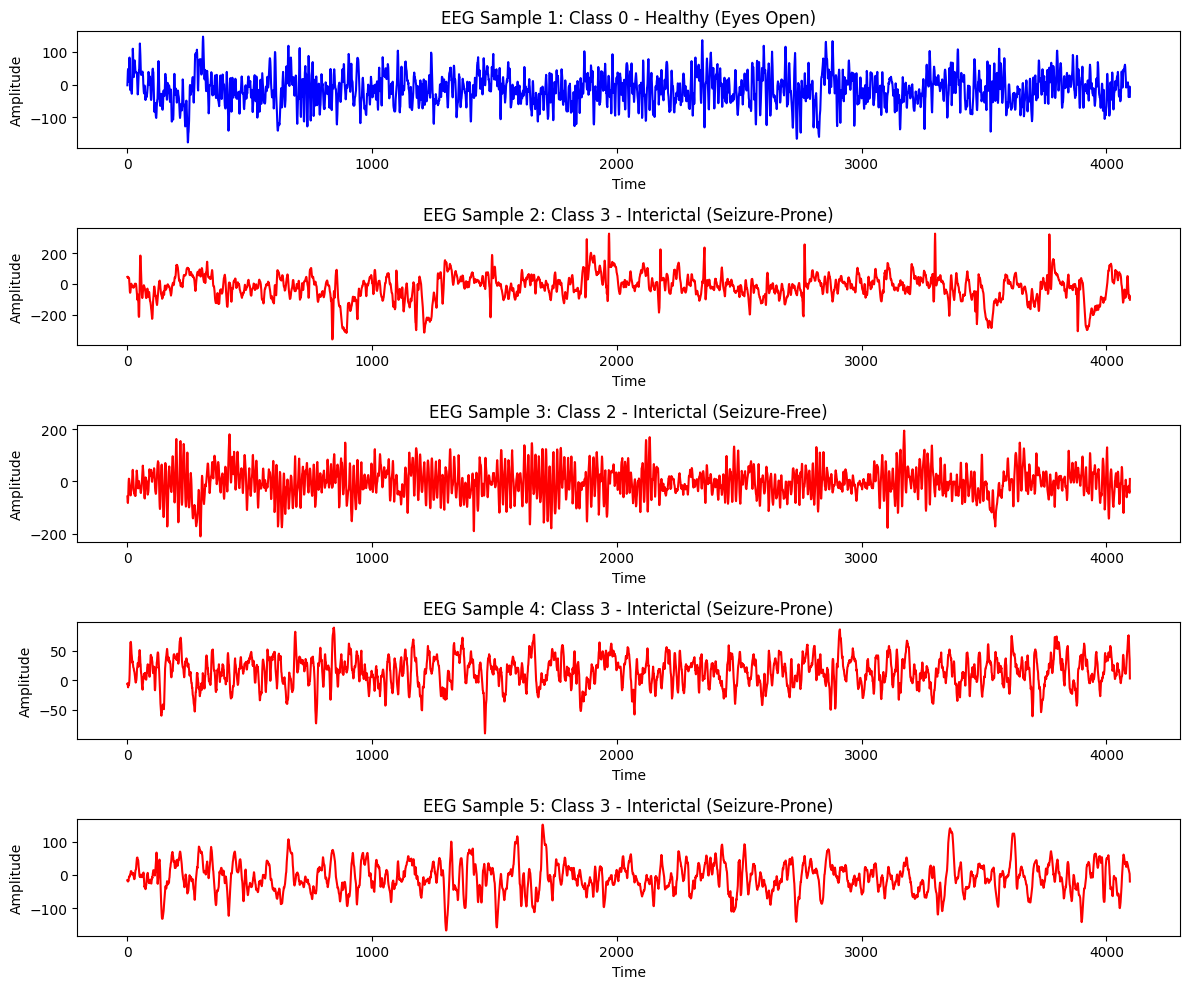

In [49]:
import random

def plot_eeg_samples(signals, labels, num_samples=5):
    plt.figure(figsize=(12, 10))
    for i in range(num_samples):
        index = random.randint(0, len(signals) - 1)
        plt.subplot(num_samples, 1, i + 1)
        plt.plot(signals[index], color='b' if labels[index] == 0 else 'r')
        plt.title(f"EEG Sample {i+1}: Class {labels[index]} - {dataset_class_map[labels[index]]}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Plot random samples
plot_eeg_samples(X, y)


## Model 0 : Random Forest Classifier Model

In [50]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model

print(f"Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8733333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.68      0.88      0.77        26
           2       0.88      0.91      0.89        23
           3       0.87      0.65      0.74        31
           4       1.00      0.97      0.98        31

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150


Confusion Matrix:
 [[37  0  1  1  0]
 [ 0 23  2  1  0]
 [ 2  0 21  0  0]
 [ 0 11  0 20  0]
 [ 0  0  0  1 30]]


### Testing on Random Samples from each class

In [51]:
def test_on_random_samples(X_test, y_test, model, num_samples=1):
    for label in np.unique(y_test):
        indices = np.where(y_test == label)[0]
        sample_indices = random.sample(list(indices), num_samples)

        print(f"\nTesting on Random Sample(s) from Class {label} - {dataset_class_map[label]}:")
        for idx in sample_indices:
            sample = X_test[idx].reshape(1, -1)  # Reshape sample for prediction
            prediction = model.predict(sample)[0]
            print(f"  Actual Label: {dataset_class_map[label]} ({label}), Predicted Label: {dataset_class_map[prediction]} ({prediction})")

# Test on one random sample from each class
test_on_random_samples(X_test_scaled, y_test, rf_model)


Testing on Random Sample(s) from Class 0 - Healthy (Eyes Open):
  Actual Label: Healthy (Eyes Open) (0), Predicted Label: Healthy (Eyes Open) (0)

Testing on Random Sample(s) from Class 1 - Healthy (Eyes Closed):
  Actual Label: Healthy (Eyes Closed) (1), Predicted Label: Healthy (Eyes Closed) (1)

Testing on Random Sample(s) from Class 2 - Interictal (Seizure-Free):
  Actual Label: Interictal (Seizure-Free) (2), Predicted Label: Interictal (Seizure-Free) (2)

Testing on Random Sample(s) from Class 3 - Interictal (Seizure-Prone):
  Actual Label: Interictal (Seizure-Prone) (3), Predicted Label: Interictal (Seizure-Prone) (3)

Testing on Random Sample(s) from Class 4 - Ictal (Seizure):
  Actual Label: Ictal (Seizure) (4), Predicted Label: Ictal (Seizure) (4)


## Model 1 : Support Vector Machine (SVM)

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma' : ['scale','auto']}

svm_model = SVC()
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring = 'accuracy')
svm_grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters for SVM:", svm_grid.best_params_)
p_pred_svm = svm_grid.predict(X_test_scaled)
print("\nSVM Model Accuracy:", accuracy_score(y_test, p_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, p_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, p_pred_svm))

Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Model Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       0.66      0.96      0.78        26
           2       0.95      0.91      0.93        23
           3       0.94      0.55      0.69        31
           4       0.97      0.97      0.97        31

    accuracy                           0.88       150
   macro avg       0.90      0.88      0.87       150
weighted avg       0.90      0.88      0.88       150


Confusion Matrix:
 [[39  0  0  0  0]
 [ 0 25  1  0  0]
 [ 2  0 21  0  0]
 [ 0 13  0 17  1]
 [ 0  0  0  1 30]]


### Test on Random Samples from each class

In [53]:
test_on_random_samples(X_test_scaled, y_test, svm_grid)


Testing on Random Sample(s) from Class 0 - Healthy (Eyes Open):
  Actual Label: Healthy (Eyes Open) (0), Predicted Label: Healthy (Eyes Open) (0)

Testing on Random Sample(s) from Class 1 - Healthy (Eyes Closed):
  Actual Label: Healthy (Eyes Closed) (1), Predicted Label: Healthy (Eyes Closed) (1)

Testing on Random Sample(s) from Class 2 - Interictal (Seizure-Free):
  Actual Label: Interictal (Seizure-Free) (2), Predicted Label: Interictal (Seizure-Free) (2)

Testing on Random Sample(s) from Class 3 - Interictal (Seizure-Prone):
  Actual Label: Interictal (Seizure-Prone) (3), Predicted Label: Healthy (Eyes Closed) (1)

Testing on Random Sample(s) from Class 4 - Ictal (Seizure):
  Actual Label: Ictal (Seizure) (4), Predicted Label: Ictal (Seizure) (4)


## Model 2 : Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb_model , gb_params, cv = 5, scoring = 'accuracy')
gb_grid.fit(X_train_scaled, y_train)

# Best parameters
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
y_pred_gb = gb_grid.predict(X_test_scaled)
print("\nGradient Boosting Model Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

Gradient Boosting Model Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.71      0.85      0.77        26
           2       0.88      0.91      0.89        23
           3       0.77      0.77      0.77        31
           4       1.00      0.94      0.97        31

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.87      0.86      0.86       150



### Test on Random Samples from each class

In [55]:
test_on_random_samples(X_test_scaled, y_test, gb_grid)


Testing on Random Sample(s) from Class 0 - Healthy (Eyes Open):
  Actual Label: Healthy (Eyes Open) (0), Predicted Label: Healthy (Eyes Open) (0)

Testing on Random Sample(s) from Class 1 - Healthy (Eyes Closed):
  Actual Label: Healthy (Eyes Closed) (1), Predicted Label: Healthy (Eyes Closed) (1)

Testing on Random Sample(s) from Class 2 - Interictal (Seizure-Free):
  Actual Label: Interictal (Seizure-Free) (2), Predicted Label: Interictal (Seizure-Free) (2)

Testing on Random Sample(s) from Class 3 - Interictal (Seizure-Prone):
  Actual Label: Interictal (Seizure-Prone) (3), Predicted Label: Interictal (Seizure-Prone) (3)

Testing on Random Sample(s) from Class 4 - Ictal (Seizure):
  Actual Label: Ictal (Seizure) (4), Predicted Label: Ictal (Seizure) (4)


### Model 3: Multilayer Perception (Neural Network)

This model uses basic configuration of a MultiLayer Perception (MLP) with hyperparameter tuning.

In [56]:
from sklearn.neural_network import MLPClassifier

# Define MLP model with hyperparameter tuning
mlp_params = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300, 500]
}

mlp_model = MLPClassifier(random_state=42)
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=5, scoring='accuracy')
mlp_grid.fit(X_train_scaled, y_train)

# Print best parameters and evaluate MLP
print("Best MLP Parameters:", mlp_grid.best_params_)
y_pred_mlp = mlp_grid.predict(X_test_scaled)
print("\nMLP Model Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best MLP Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 300}

MLP Model Accuracy: 0.8866666666666667
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.73      0.92      0.81        26
           2       0.84      0.91      0.88        23
           3       0.92      0.71      0.80        31
           4       1.00      0.97      0.98        31

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.88       150
weighted avg       0.90      0.89      0.89       150



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluate Model Performance with learning curves for different models

Random Forest Learning Curve:


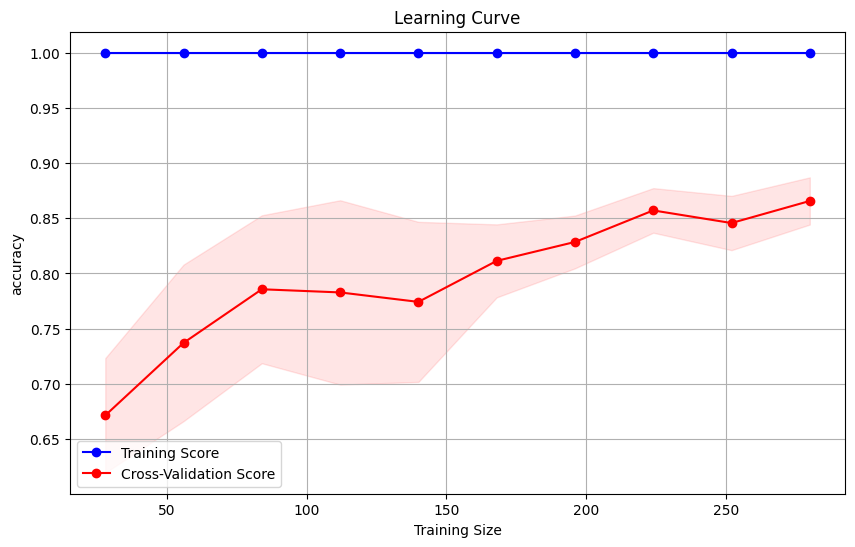

SVM Learning Curve:


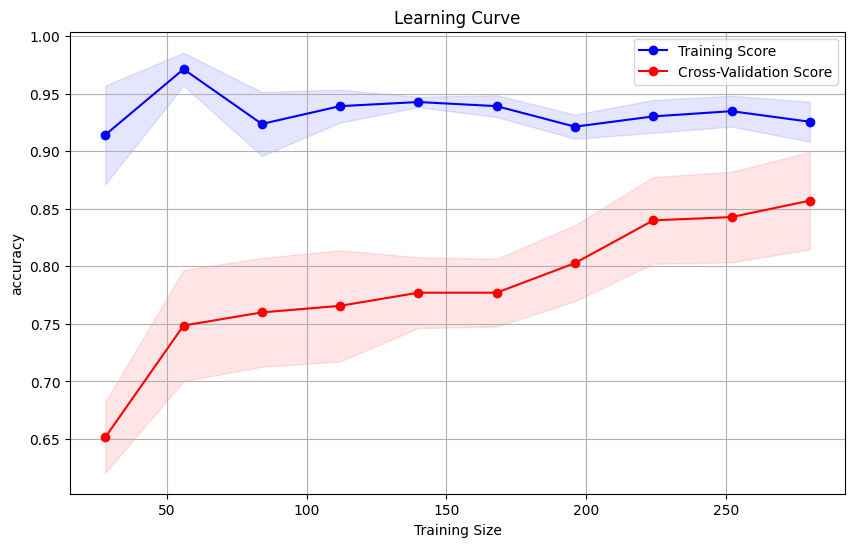

Gradient Boosting Learning Curve:


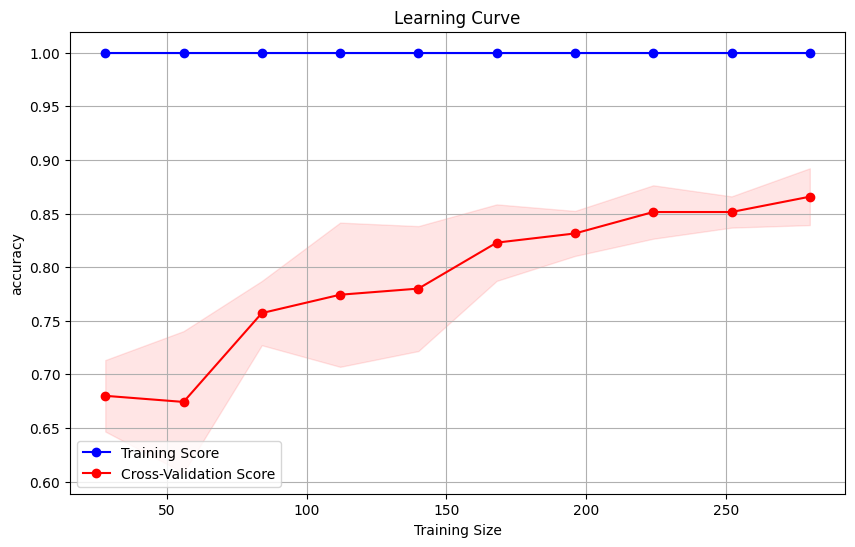

MLP Learning Curve:


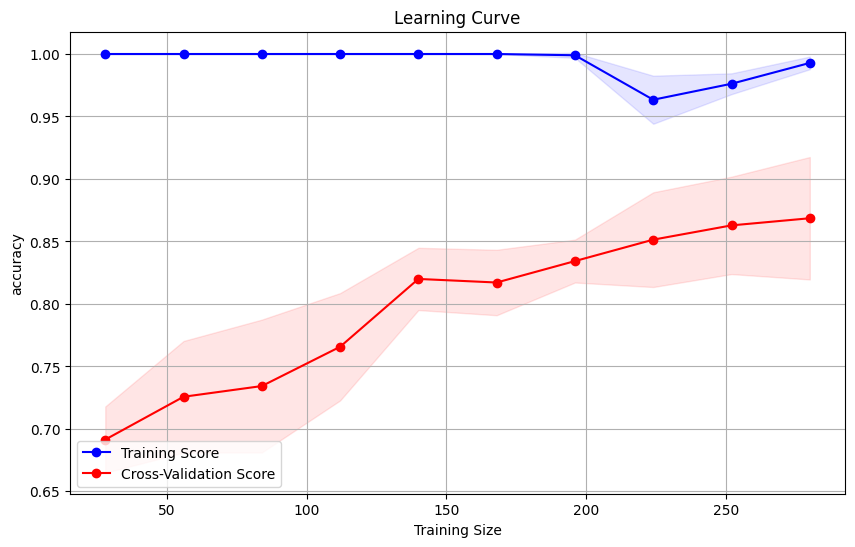

In [57]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(model, X, y, cv=5, scoring='accuracy', title='Learning Curve'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-Validation Score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel(scoring)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curves for each model
print("Random Forest Learning Curve:")
plot_learning_curve(rf_model, X_train_scaled, y_train)

print("SVM Learning Curve:")
plot_learning_curve(svm_grid.best_estimator_, X_train_scaled, y_train)

print("Gradient Boosting Learning Curve:")
plot_learning_curve(gb_grid.best_estimator_, X_train_scaled, y_train)

print("MLP Learning Curve:")
plot_learning_curve(mlp_grid.best_estimator_, X_train_scaled, y_train)


## Pre-processing for 2 Dim

In [58]:
X_train_2d = X_train_scaled.reshape(-1, X_train_scaled.shape[1],1,1)
X_test_2d = X_test_scaled.reshape(-1,X_test_scaled.shape[1],1,1)
input_shape_2d = (X_train_scaled.shape[1],1,1)

num_classes = len(np.unique(y_train))

## Model 4 : EpilepsyNet Architecture

In [59]:
def epilepsyNet(input_shape, num_classes):

  model = Sequential()

  # Use a 1x1 kernel for the first Conv2D layer
  model.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(1, 1)))

  model.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(1, 1)))

  model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(1, 1)))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [60]:
model = epilepsyNet(input_shape_2d, num_classes)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 42, 1, 32)           │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 42, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 42, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 1, 64)           │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 42, 1, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 42, 1, 128)          │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 42, 1, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 42, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5376)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,376,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,389,189 (5.30 MB)

 Trainable params: 1,388,741 (5.30 MB)

 Non-trainable params: 448 (1.75 KB)

In [61]:
# Early stopping to avoid overfitting

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 10, restore_best_weights = True)

# Train the model
history = model.fit(X_train_2d, y_train, epochs = 50, batch_size = 32,verbose = 1,
                    validation_data = (X_test_2d, y_test),
                    callbacks = [early_stopping])



Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.4144 - loss: 1.7422 - val_accuracy: 0.4800 - val_loss: 1.5152
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7447 - loss: 0.5509 - val_accuracy: 0.5533 - val_loss: 1.4752
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8189 - loss: 0.4733 - val_accuracy: 0.5133 - val_loss: 1.4603
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8415 - loss: 0.3589 - val_accuracy: 0.4733 - val_loss: 1.4556
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8143 - loss: 0.4184 - val_accuracy: 0.4733 - val_loss: 1.4416
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8632 - loss: 0.3131 - val_accuracy: 0.4133 - val_loss: 1.4294
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8680 - loss: 0.3246 - val_accuracy: 0.4600 - val_loss: 1.4072
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9061 - loss: 0.1949 - val_accuracy: 0.4533 - v

In [62]:
# Evaluate the model on the test set

test_loss , test_accuracy = model.evaluate(X_test_2d, y_test, verbose = 1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8465 - loss: 0.3225
Test Accuracy: 85.33%


In [63]:
# {redict on test data
y_pred = np.argmax(model.predict(X_test_2d), axis = 1)

# classification report and confusion matrix

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        39
           1       0.63      0.92      0.75        26
           2       0.79      0.96      0.86        23
           3       0.94      0.52      0.67        31
           4       1.00      1.00      1.00        31

    accuracy                           0.85       150
   macro avg       0.87      0.86      0.84       150
weighted avg       0.88      0.85      0.85       150


Confusion Matrix:
 [[35  0  4  0  0]
 [ 0 24  1  1  0]
 [ 1  0 22  0  0]
 [ 0 14  1 16  0]
 [ 0  0  0  0 31]]


## Model 5: HyperTuned Model using Keras Tuner

In [64]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

In [65]:
def build_hypermodel(hp):
    inputs = Input(shape=input_shape_2d)

    # Block 1
    x = Conv2D(
        filters=hp.Int('filters_block1', min_value=16, max_value=64, step=16),
        kernel_size=(3, 3),
        padding="same",  # 'same' padding helps maintain dimensions
        activation=None
    )(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(1, 1), padding='same')(x)  # Changed to (1, 1) pool size, padding='same' to avoid downsampling too much

    # Block 2
    x = Conv2D(
        filters=hp.Int('filters_block2', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        padding="same",  # 'same' padding helps maintain dimensions
        activation=None
    )(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(1, 1), padding='same')(x) # Changed to (1, 1) pool size, padding='same' to avoid downsampling too much

    # Block 3
    x = Conv2D(
        filters=hp.Int('filters_block3', min_value=64, max_value=256, step=64),
        kernel_size=(3, 3),
        padding="same", # 'same' padding helps maintain dimensions
        activation=None
    )(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(1, 1), padding='same')(x)  # Changed to (1, 1) pool size, padding='same' to avoid downsampling too much


    # Fully connected layers
    x = Flatten()(x)
    x = Dense(hp.Int('dense_units1', min_value=64, max_value=256, step=64), activation="relu")(x)
    x = Dropout(hp.Float('dropout1', min_value=0.3, max_value=0.7, step=0.1))(x)
    x = Dense(hp.Int('dense_units2', min_value=32, max_value=128, step=32), activation="relu")(x)
    x = Dropout(hp.Float('dropout2', min_value=0.3, max_value=0.7, step=0.1))(x)

    # Output layer
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [66]:
# Instantiate the tuner
tuner = kt.Hyperband(
    build_hypermodel,
    objective='val_accuracy',
    max_epochs=50,
    factor=5,
    directory='kt_tuning',
    project_name='epilepsy_seizure_detection'
)

# Search for the best hyperparameters
tuner.search(
    X_train_2d, y_train_onehot,
    validation_data=(X_test_2d, y_test_onehot),
    epochs=50,
    batch_size=32,
    verbose=1
)

Trial 59 Complete [00h 00m 37s]
val_accuracy: 0.9133333563804626

Best val_accuracy So Far: 0.9200000166893005
Total elapsed time: 00h 15m 57s


In [67]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train_2d, y_train_onehot,
    validation_data=(X_test_2d, y_test_onehot),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.3546 - loss: 1.6509 - val_accuracy: 0.6800 - val_loss: 1.5773
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5422 - loss: 1.0596 - val_accuracy: 0.5133 - val_loss: 1.5483
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6803 - loss: 0.8365 - val_accuracy: 0.5067 - val_loss: 1.5034
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6905 - loss: 0.7542 - val_accuracy: 0.4400 - val_loss: 1.4800
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7423 - loss: 0.6782 - val_accuracy: 0.3067 - val_loss: 1.4950
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7425 - loss: 0.6696 - val_accuracy: 0.4933 - val_loss: 1.4232
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6911 - loss: 0.6712 - val_accuracy: 0.3667 - val_loss: 1.4136
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7542 - loss: 0.6213 - val_accuracy: 0.4467 - v

In [68]:
test_loss, test_accuracy = best_model.evaluate(X_test_2d, y_test_onehot)
print(f"Best Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8767 - loss: 0.3640
Best Test Accuracy: 88.00%


## Model 6: CNN + LSTM/GRU

In [69]:
from tensorflow.keras.layers import LSTM, GRU , Reshape

def create_cnn_lstm_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Convolutional Block 1
    x = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(1, 1), padding='same')(x) # Change pool_size and add padding='same'

    # Convolutional Block 2
    x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(1, 1), padding='same')(x)  # Change pool_size and add padding='same'


    # Flatten and reshape for LSTM input
    x = Flatten()(x)
    # Reshape to 3D for LSTM: (batch_size, timesteps, features)
    # Assuming input_shape[0] is the number of features
    x = Reshape((1, -1))(x)  # Reshape to (batch_size, 1, features)
    #x = Reshape((-1, input_shape[0], input_shape[1]))(x) # Reshape using Keras layer #OLD LINE


    # LSTM layers
    x = LSTM(128, return_sequences=True, dropout=0.3)(x)
    x = GRU(64, dropout=0.3)(x)

    # Fully connected layers
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.5)(x)

    # Output layer
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Build and train the model
cnn_lstm_model = create_cnn_lstm_model(input_shape_2d, num_classes)
history = cnn_lstm_model.fit(
    X_train_2d, y_train_onehot,
    validation_data=(X_test_2d, y_test_onehot),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.3990 - loss: 1.4497 - val_accuracy: 0.5133 - val_loss: 1.5466
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7498 - loss: 0.9191 - val_accuracy: 0.7200 - val_loss: 1.4433
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7491 - loss: 0.7331 - val_accuracy: 0.7867 - val_loss: 1.3409
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7804 - loss: 0.5844 - val_accuracy: 0.7333 - val_loss: 1.2484
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7950 - loss: 0.5335 - val_accuracy: 0.8333 - val_loss: 1.1766
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8547 - loss: 0.4368 - val_accuracy: 0.7800 - val_loss: 1.0932
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8292 - loss: 0.4022 - val_accuracy: 0.7667 - val_loss: 1.0121
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8910 - loss: 0.3144 - val_accuracy: 0

In [70]:
test_loss, test_accuracy = cnn_lstm_model.evaluate(X_test_2d, y_test_onehot)
print(f"Best Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8845 - loss: 0.4759 
Best Test Accuracy: 88.00%


## Model 7 : Custom CNN Model

In [71]:
# Build Improved Model
def build_best_model(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))

    # Block 1
    x = Dense(256, activation='relu')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Block 2
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Residual Block 3
    shortcut = x
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])  # Residual connection
    x = Dropout(0.3)(x)

    # Block 4
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output Layer
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Model Compilation
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [72]:
# Create the model
input_shape = X_features.shape[1]
num_classes = len(np.unique(y))
model = build_best_model(input_shape, num_classes)

# Callbacks for Better Training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [73]:
# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.1668 - loss: 2.5870 - val_accuracy: 0.3067 - val_loss: 1.7053 - learning_rate: 1.0000e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1738 - loss: 2.4747 - val_accuracy: 0.3667 - val_loss: 1.6389 - learning_rate: 1.0000e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2784 - loss: 2.1833 - val_accuracy: 0.3733 - val_loss: 1.5964 - learning_rate: 1.0000e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2877 - loss: 2.0214 - val_accuracy: 0.4400 - val_loss: 1.5525 - learning_rate: 1.0000e-04
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2919 - loss: 1.9390 - val_accuracy: 0.4800 - val_loss: 1.5091 - learning_rate: 1.0000e-04
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3497 - loss: 1.7550 - val_accuracy: 0.5267 - val_loss: 1.4630 - learning_rate: 1.0000e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0

In [74]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 82.00%


## Model 8 : Ensemble Learning Model

In [75]:
y_onehot = to_categorical(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_onehot, test_size=0.3, random_state=42)

# Reshape data for CNN + LSTM input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Data Augmentation (Gaussian Noise)
def add_noise(data, noise_factor=0.1):
    return data + noise_factor * np.random.normal(size=data.shape)

X_train_augmented = np.vstack([X_train_cnn, add_noise(X_train_cnn)])
y_train_augmented = np.vstack([y_train, y_train])  # Duplicate labels

# CNN + LSTM Architecture
def build_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # Convolutional Layers
    x = Conv1D(filters=32, kernel_size=3, padding="same")(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(filters=64, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)

    # LSTM Layer
    x = LSTM(64, return_sequences=False)(x)

    # Fully Connected Layers
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=x)
    return model

# Compile the model
input_shape = (X_train_cnn.shape[1], 1)
num_classes = y_train.shape[1]

cnn_lstm_model = build_model(input_shape, num_classes)
cnn_lstm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the CNN + LSTM Model
early_stopping = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history = cnn_lstm_model.fit(
    X_train_augmented, y_train_augmented,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate CNN + LSTM Model
cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_test_cnn, y_test, verbose=0)[1]

# Random Forest Classifier for Ensemble
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, np.argmax(y_train, axis=1))

rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), rf_predictions)

# Ensemble: Weighted Voting
cnn_lstm_preds = cnn_lstm_model.predict(X_test_cnn)
ensemble_preds = 0.7 * cnn_lstm_preds + 0.3 * to_categorical(rf_predictions)

final_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(ensemble_preds, axis=1))

# Print results
print(f"CNN + LSTM Accuracy: {cnn_lstm_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Ensemble Model Accuracy: {final_accuracy * 100:.2f}%")

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.3272 - loss: 1.5805 - val_accuracy: 0.2143 - val_loss: 1.5196
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4269 - loss: 1.4205 - val_accuracy: 0.2214 - val_loss: 1.4960
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4525 - loss: 1.2304 - val_accuracy: 0.2857 - val_loss: 1.6297
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3955 - loss: 1.2520 - val_accuracy: 0.2929 - val_loss: 1.4948
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4301 - loss: 1.1918 - val_accuracy: 0.2857 - val_loss: 1.5704
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4360 - loss: 1.1903 - val_accuracy: 0.3500 - val_loss: 1.3826
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4390 - loss: 1.1875 - val_accuracy: 0.3214 - val_loss: 1.4275
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4787 - loss: 1.1184 - val_accuracy: 0.3571 - val_loss: 1.3544


In [76]:
print(f"CNN + LSTM Accuracy: {cnn_lstm_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Ensemble Model Accuracy: {final_accuracy * 100:.2f}%")

CNN + LSTM Accuracy: 51.33%
Random Forest Accuracy: 87.33%
Ensemble Model Accuracy: 86.67%


## Model 9 : Ensemble Learning + Keras Tuner

In [77]:
# Define a CNN+LSTM model for hyperparameter tuning
def build_tunable_model(hp):
    input_layer = Input(shape=(X_train_cnn.shape[1], 1))

    # Convolutional layers
    x = Conv1D(
        filters=hp.Choice('filters_1', values=[16, 32, 64]),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation="relu",
        padding="same")(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1))(x)

    x = Conv1D(
        filters=hp.Choice('filters_2', values=[32, 64, 128]),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation="relu",
        padding="same")(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1))(x)

    # LSTM layer
    x = LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False)(x)

    # Dense layers
    x = Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation="relu")(x)
    x = Dropout(hp.Float('dropout_dense', min_value=0.1, max_value=0.5, step=0.1))(x)
    output_layer = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


tuner = Hyperband(
    build_tunable_model,
    objective = 'val_accuracy',
    max_epochs = 50,
    factor = 3,
    directory = 'tuner_dir',
    project_name = 'cnn_lstm_ensemble'
)

tuner.search(X_train_cnn, y_train, epochs = 50, validation_split = 0.2, batch_size = 64)

Trial 90 Complete [00h 00m 23s]
val_accuracy: 0.24285714328289032

Best val_accuracy So Far: 0.6285714507102966
Total elapsed time: 00h 16m 59s


In [78]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the optimized CNN+LSTM model
history = best_model.fit(
    X_train_cnn, y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 64,
    verbose = 1,
    callbacks = [early_stopping]
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.1845 - loss: 1.6704 - val_accuracy: 0.1286 - val_loss: 1.6190
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1924 - loss: 1.6229 - val_accuracy: 0.2714 - val_loss: 1.6044
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2404 - loss: 1.6238 - val_accuracy: 0.3000 - val_loss: 1.5967
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2450 - loss: 1.6207 - val_accuracy: 0.3143 - val_loss: 1.5889
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2565 - loss: 1.6173 - val_accuracy: 0.3286 - val_loss: 1.5761
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2385 - loss: 1.6006 - val_accuracy: 0.2000 - val_loss: 1.5755
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2276 - loss: 1.6015 - val_accuracy: 0.2429 - val_loss: 1.5678
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2795 - loss: 1.5735 - val_accuracy: 0.3000 - val_loss: 1.5612

In [79]:
# Evaluate CNN+LSTM
cnn_lstm_accuracy = best_model.evaluate(X_test_cnn, y_test, verbose=0)[1]
assert 0 <= cnn_lstm_accuracy <= 1, "CNN+LSTM Accuracy out of expected range [0, 1]"

# Ensemble Model Predictions
cnn_preds = best_model.predict(X_test_cnn)  # Ensure softmax output
rf_predictions = rf_clf.predict(X_test)    # Ensure integer class labels

# Check dimensions
assert cnn_preds.shape[1] == y_test.shape[1], "CNN Preds and y_test shape mismatch"
assert rf_predictions.shape[0] == y_test.shape[0], "RF Predictions and y_test size mismatch"

# Optimize Ensemble Weights
def optimize_weights(cnn_preds, rf_preds, y_true):
    best_acc = 0
    best_weights = (0.5, 0.5)
    for w1 in np.linspace(0, 1, 21):
        w2 = 1 - w1
        ensemble_preds = w1 * cnn_preds + w2 * to_categorical(rf_preds)
        acc = accuracy_score(np.argmax(y_true, axis=1), np.argmax(ensemble_preds, axis=1))
        if acc > best_acc:
            best_acc = acc
            best_weights = (w1, w2)
    return best_weights

best_weights = optimize_weights(cnn_preds, rf_predictions, y_test)
w1, w2 = best_weights

# Final Ensemble Accuracy
ensemble_preds = w1 * cnn_preds + w2 * to_categorical(rf_predictions)
final_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(ensemble_preds, axis=1))

# Print Results
print(f"Optimized CNN+LSTM Accuracy: {cnn_lstm_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Ensemble Model with Optimized Weights Accuracy: {final_accuracy * 100:.2f}%")


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Optimized CNN+LSTM Accuracy: 22.67%
Random Forest Accuracy: 87.33%
Ensemble Model with Optimized Weights Accuracy: 87.33%


## Model 10 : Optimized CNN + LSTM Model

In [80]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Dropout, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Assuming X_features and y have already been prepared
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN+LSTM input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build improved CNN+LSTM model
def build_improved_model():
    input_layer = Input(shape=(X_train_cnn.shape[1], 1))

    # Convolutional layers
    x = Conv1D(filters=64, kernel_size=3, activation="relu", padding="same")(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    # LSTM layer
    x = LSTM(units=64, return_sequences=False)(x)
    x = Dropout(0.3)(x)

    # Dense layers
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.4)(x)
    output_layer = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Train CNN+LSTM model
improved_model = build_improved_model()
history = improved_model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)]
)

# Evaluate CNN+LSTM model
cnn_lstm_accuracy = improved_model.evaluate(X_test_cnn, y_test, verbose=0)[1]
print(f"Improved CNN+LSTM Accuracy: {cnn_lstm_accuracy * 100:.2f}%")

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, np.argmax(y_train, axis=1))
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Optimize Ensemble Weights
def optimize_weights(cnn_preds, rf_preds, y_true):
    best_acc = 0
    best_weights = (0.5, 0.5)
    for w1 in np.linspace(0, 1, 21):
        w2 = 1 - w1
        ensemble_preds = w1 * cnn_preds + w2 * to_categorical(rf_preds)
        acc = accuracy_score(np.argmax(y_true, axis=1), np.argmax(ensemble_preds, axis=1))
        if acc > best_acc:
            best_acc = acc
            best_weights = (w1, w2)
    return best_weights



Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.2659 - loss: 1.5815 - val_accuracy: 0.2571 - val_loss: 1.5884
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4624 - loss: 1.4033 - val_accuracy: 0.3000 - val_loss: 1.5684
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5847 - loss: 1.2549 - val_accuracy: 0.4143 - val_loss: 1.5393
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6056 - loss: 1.1753 - val_accuracy: 0.5143 - val_loss: 1.5053
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6068 - loss: 1.0815 - val_accuracy: 0.5714 - val_loss: 1.4735
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6232 - loss: 1.0110 - val_accuracy: 0.5857 - val_loss: 1.4514
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6787 - loss: 0.9240 - val_accuracy: 0.5143 - val_loss: 1.4346
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7072 - loss: 0.8689 - val_accuracy: 0.4857 - val_loss: 1.4185

In [81]:
# Evaluate CNN+LSTM model
cnn_lstm_accuracy = improved_model.evaluate(X_test_cnn, y_test, verbose=0)[1]
print(f"Improved CNN+LSTM Accuracy: {cnn_lstm_accuracy * 100:.2f}%")

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, np.argmax(y_train, axis=1))
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# Optimize Ensemble Weights
def optimize_weights(cnn_preds, rf_preds, y_true):
    best_acc = 0
    best_weights = (0.5, 0.5)
    for w1 in np.linspace(0, 1, 21):
        w2 = 1 - w1
        ensemble_preds = w1 * cnn_preds + w2 * to_categorical(rf_preds)
        acc = accuracy_score(np.argmax(y_true, axis=1), np.argmax(ensemble_preds, axis=1))
        if acc > best_acc:
            best_acc = acc
            best_weights = (w1, w2)
    return best_weights


# Ensemble Predictions
cnn_preds = improved_model.predict(X_test_cnn)
best_weights = optimize_weights(cnn_preds, rf_predictions, y_test)

# Apply optimized weights
w1, w2 = best_weights
ensemble_preds = w1 * cnn_preds + w2 * to_categorical(rf_predictions)
final_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(ensemble_preds, axis=1))

print(f"Ensemble Model with Optimized Weights Accuracy: {final_accuracy * 100:.2f}%")


Improved CNN+LSTM Accuracy: 60.67%
Random Forest Accuracy: 87.33%
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Ensemble Model with Optimized Weights Accuracy: 87.33%


## Model 11

In [82]:
y_onehot = to_categorical(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_onehot, test_size=0.3, random_state=42)

# Reshape data for CNN + LSTM input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Data Augmentation (Gaussian Noise)
def add_noise(data, noise_factor=0.1):
    return data + noise_factor * np.random.normal(size=data.shape)

X_train_augmented = np.vstack([X_train_cnn, add_noise(X_train_cnn)])
y_train_augmented = np.vstack([y_train, y_train])  # Duplicate labels

# CNN + LSTM Architecture
def build_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # Convolutional Layers
    x = Conv1D(filters=32, kernel_size=3, padding="same")(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(filters=64, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)

    # LSTM Layer
    x = LSTM(64, return_sequences=False)(x)

    # Fully Connected Layers
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=input_layer, outputs=x)
    return model

# Compile the model
input_shape = (X_train_cnn.shape[1], 1)
num_classes = y_train.shape[1]

cnn_lstm_model = build_model(input_shape, num_classes)
cnn_lstm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the CNN + LSTM Model
early_stopping = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history = cnn_lstm_model.fit(
    X_train_augmented, y_train_augmented,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate CNN + LSTM Model
cnn_lstm_accuracy = cnn_lstm_model.evaluate(X_test_cnn, y_test, verbose=0)[1]

# Random Forest Classifier for Ensemble
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, np.argmax(y_train, axis=1))

rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), rf_predictions)

# Ensemble: Weighted Voting
cnn_lstm_preds = cnn_lstm_model.predict(X_test_cnn)
ensemble_preds = 0.7 * cnn_lstm_preds + 0.3 * to_categorical(rf_predictions)

final_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(ensemble_preds, axis=1))

# Print results
print(f"CNN + LSTM Accuracy: {cnn_lstm_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Ensemble Model Accuracy: {final_accuracy * 100:.2f}%")

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.2951 - loss: 1.5630 - val_accuracy: 0.2143 - val_loss: 1.4943
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3927 - loss: 1.3862 - val_accuracy: 0.2357 - val_loss: 1.4729
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4310 - loss: 1.2348 - val_accuracy: 0.2786 - val_loss: 1.5292
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4170 - loss: 1.2270 - val_accuracy: 0.2929 - val_loss: 1.5216
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4125 - loss: 1.2194 - val_accuracy: 0.3357 - val_loss: 1.3820
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4469 - loss: 1.1812 - val_accuracy: 0.3500 - val_loss: 1.3379
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4580 - loss: 1.1593 - val_accuracy: 0.3357 - val_loss: 1.4075
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4211 - loss: 1.2189 - val_accuracy: 0.3643 - val_loss: 1.3331


## Model 12

In [83]:
# -------------------------------
# 1. Train Random Forest
# -------------------------------
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

rf_clf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring="accuracy")
grid_rf.fit(X_train, np.argmax(y_train, axis=1))
best_rf = grid_rf.best_estimator_

rf_predictions = best_rf.predict(X_test)
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), rf_predictions)
print(f"Tuned Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# -------------------------------
# 2. Train Gradient Boosting
# -------------------------------
param_grid_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
}

gb_clf = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=3, n_jobs=-1, scoring="accuracy")
grid_gb.fit(X_train, np.argmax(y_train, axis=1))
best_gb = grid_gb.best_estimator_

gb_predictions = best_gb.predict(X_test)
gb_accuracy = accuracy_score(np.argmax(y_test, axis=1), gb_predictions)
print(f"Tuned Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")

# -------------------------------
# 3. Optimized Weighted Ensemble
# -------------------------------
def optimize_weights(predictions_list, y_true):
    best_acc = 0
    best_weights = None
    num_models = len(predictions_list)
    weights_range = np.linspace(0, 1, 21)

    for weights in np.nditer(np.meshgrid(*[weights_range]*num_models)):
        weights = np.array(weights).reshape(-1)
        if np.isclose(weights.sum(), 1.0):
            ensemble_preds = np.zeros_like(predictions_list[0])
            for weight, preds in zip(weights, predictions_list):
                # Directly use probabilities without to_categorical
                ensemble_preds += weight * preds
            acc = accuracy_score(np.argmax(y_true, axis=1), np.argmax(ensemble_preds, axis=1))
            if acc > best_acc:
                best_acc = acc
                best_weights = weights
    return best_weights

# Gather model predictions
rf_probabilities = best_rf.predict_proba(X_test)
gb_probabilities = best_gb.predict_proba(X_test)

# Optimize weights
predictions_list = [rf_probabilities, gb_probabilities]
optimized_weights = optimize_weights([rf_probabilities, gb_probabilities], y_test)

# Apply optimized weights
final_ensemble_preds = np.zeros_like(rf_probabilities)
for weight, preds in zip(optimized_weights, predictions_list):
    final_ensemble_preds += weight * preds

final_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(final_ensemble_preds, axis=1))
print(f"Final Optimized Weighted Ensemble Accuracy: {final_accuracy * 100:.2f}%")


Tuned Random Forest Accuracy: 88.00%
Tuned Gradient Boosting Accuracy: 86.67%
Final Optimized Weighted Ensemble Accuracy: 88.67%


## Model 13

In [84]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier  # LightGBM for compatibility

# -------------------------------
# 1. Train Random Forest
# -------------------------------
rf_clf = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42
)
rf_clf.fit(X_train, np.argmax(y_train, axis=1))

# -------------------------------
# 2. Train Gradient Boosting
# -------------------------------
gb_clf = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
)
gb_clf.fit(X_train, np.argmax(y_train, axis=1))

# -------------------------------
# 3. Train LightGBM
# -------------------------------
lgb_clf = LGBMClassifier(random_state=42, verbose=-1)
lgb_clf.fit(X_train, np.argmax(y_train, axis=1))

# -------------------------------
# 4. Stacking Ensemble
# -------------------------------
base_models = [
    ("random_forest", rf_clf),
    ("gradient_boosting", gb_clf),
    ("lightgbm", lgb_clf),
]

meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)
stacking_clf.fit(X_train, np.argmax(y_train, axis=1))

# -------------------------------
# 5. Final Evaluation
# -------------------------------
stacking_predictions = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(np.argmax(y_test, axis=1), stacking_predictions)
print(f"Final Stacking Ensemble Accuracy: {stacking_accuracy * 100:.2f}%")

# -------------------------------
# 6. Save Final Model
# -------------------------------
import joblib

joblib.dump(stacking_clf, "final_stacking_model.pkl")
print("Final Stacking Model Saved!")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Final Stacking Ensemble Accuracy: 89.33%
Final Stacking Model Saved!


## Model X

In [85]:
from scipy.signal import butter, filtfilt

def preprocess_signal(signal, fs=173.61, lowcut=0.5, highcut=40.0):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(5, [low, high], btype="band")
    return filtfilt(b, a, signal)

def preprocess_eeg_dataset(data):
    return np.array([preprocess_signal(sig) for sig in data])

# Apply preprocessing to raw EEG signals
X_processed = preprocess_eeg_dataset(X)

# Extract features for each signal individually
X_features = np.array([extract_signal_features(signal) for signal in X_processed])

print(f"Feature matrix shape: {X_features.shape}")

Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculatin

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# -------------------------------------
# Deep Learning Model: CNN + LSTM
# -------------------------------------
def build_cnn_lstm_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation="relu", input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        LSTM(50, return_sequences=True),
        Flatten(),
        Dense(100, activation="relu"),
        Dropout(0.5),
        Dense(len(np.unique(y_train)), activation="softmax")
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

cnn_lstm_input_shape = (X_train_scaled.shape[1], 1)
cnn_lstm_model = build_cnn_lstm_model((cnn_lstm_input_shape[0], 1))
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

y_train_encoded = to_categorical(y_train, num_classes=len(np.unique(y_train)))

cnn_lstm_model.fit(
    X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1),
    y_train_encoded,  # Use the encoded labels here
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Ensure y_test is a 1D array of labels
cnn_lstm_predictions = cnn_lstm_model.predict(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1))

# Compare predictions with the actual labels
cnn_lstm_accuracy = accuracy_score(y_test, np.argmax(cnn_lstm_predictions, axis=1))
print(f"CNN + LSTM Model Accuracy: {cnn_lstm_accuracy * 100:.2f}%")

# -------------------------------------
# Stacking Ensemble
# -------------------------------------
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)

base_models = [
    ("Random Forest", rf_clf),
    ("Gradient Boosting", gb_clf)
]

meta_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3)
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_clf.fit(X_train_scaled, y_train)
stacking_predictions = stacking_clf.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Ensemble Model Accuracy: {stacking_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.3375 - loss: 1.5296 - val_accuracy: 0.5000 - val_loss: 1.3316
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5475 - loss: 1.1786 - val_accuracy: 0.5714 - val_loss: 1.0520
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6695 - loss: 0.9665 - val_accuracy: 0.5857 - val_loss: 0.8978
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6455 - loss: 0.8514 - val_accuracy: 0.6571 - val_loss: 0.7066
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6916 - loss: 0.7408 - val_accuracy: 0.6857 - val_loss: 0.6826
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7579 - loss: 0.6161 - val_accuracy: 0.7714 - val_loss: 0.5430
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7166 - loss: 0.6693 - val_accuracy: 0.7429 - val_loss: 0.5491
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7785 - loss: 0.5466 - val_accuracy: 0.7429 - val_loss: 0.4946

In [88]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Learning Curve (Plotting Train and Validation Accuracy/Loss)
def plot_learning_curve(history):
    # Plot accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix' + (' (Normalized)' if normalize else ''))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_pred_prob, classes):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr, tpr, thresholds = roc_curve(y_true == i, y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_prob, classes):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_true == i, y_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {classes[i]}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

# Feature Importance for Random Forest or Gradient Boosting
def plot_feature_importance(model, X_train, num_features=10):
    feature_importances = model.feature_importances_
    indices = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.barh(range(num_features), feature_importances[indices[:num_features]], align='center')
    plt.yticks(range(num_features), [f'Feature {i+1}' for i in indices[:num_features]])
    plt.xlabel('Feature Importance')
    plt.title('Top Feature Importance in Model')
    plt.show()

# Classification Report (Precision, Recall, F1-Score)
def plot_classification_report(y_true, y_pred, classes):
    report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)
    df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.iloc[:-1, :].T, annot=True, fmt='.2f', cmap='Blues')
    plt.title('Classification Report')
    plt.show()

# Prediction Distribution
def plot_prediction_distribution(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.hist(y_true, bins=np.arange(len(np.unique(y_true)) + 1) - 0.5, alpha=0.5, label="True Labels", color="b")
    plt.hist(y_pred, bins=np.arange(len(np.unique(y_pred)) + 1) - 0.5, alpha=0.5, label="Predictions", color="r")
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.title('Prediction Distribution')
    plt.legend(loc='best')
    plt.show()


# Plot confusion matrix
plot_confusion_matrix(np.argmax(y_test, axis=1), np.argmax(final_ensemble_preds, axis=1), classes=['Z', 'O', 'N', 'F', 'S'], normalize=True)

# Plot ROC curve for the ensemble model
plot_roc_curve(np.argmax(y_test, axis=1), final_ensemble_preds, classes=['Z', 'O', 'N', 'F', 'S'])

# Plot Precision-Recall curve for the ensemble model
plot_precision_recall_curve(np.argmax(y_test, axis=1), final_ensemble_preds, classes=['Z', 'O', 'N', 'F', 'S'])

# Plot feature importance for Random Forest
plot_feature_importance(best_rf, X_train)

# Plot classification report for the ensemble model
plot_classification_report(np.argmax(y_test, axis=1), np.argmax(final_ensemble_preds, axis=1), classes=['Z', 'O', 'N', 'F', 'S'])

# Plot prediction distribution
plot_prediction_distribution(np.argmax(y_test, axis=1), np.argmax(final_ensemble_preds, axis=1))


AxisError: axis 1 is out of bounds for array of dimension 1